In [ ]:
!pip install -qU statsmodels

In [83]:
!pip install -qU imbalanced-learn

In [111]:
!pip install -qU xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 3.8 MB/s eta 0:00:00


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

import joblib

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from imblearn.over_sampling import SMOTE

from scipy.stats import randint

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [ ]:
data.drop(columns = ['Unnamed: 0','Booking_ID'] , axis = 1, inplace=True)

In [ ]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,1.844280,0.106306,0.807822,2.202068,0.031943,85.376085,2017.820434,7.416506,15.598725,0.025775,0.023880,0.154721,103.501785,0.619917
std,0.518692,0.405391,0.868111,1.402801,0.175853,85.859070,0.383832,3.060058,8.740151,0.158467,0.375994,1.777787,35.137794,0.786348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.850000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [ ]:
data.shape

(29020, 18)

In [ ]:
data.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [ ]:
data.duplicated().sum()

np.int64(7661)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
for i in data.columns:
  print(data[i].value_counts())
  print()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

lead_time
0      951
1      

In [ ]:
num_cols = [i for i in data.columns if data[i].dtype!='O']
cat_cols = [i for i in data.columns if data[i].dtype=='O']

In [ ]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [ ]:
cat_cols.append('required_car_parking_space')
cat_cols.append('repeated_guest')

In [ ]:
for i in cat_cols:
  if i in num_cols:
    num_cols.remove(i)

In [ ]:
len(num_cols)

12

In [ ]:
len(num_cols)+len(cat_cols)

18

In [ ]:
df = data.copy()

In [ ]:
def num_plot_dist(df, num_features):
  fig, axes = plt.subplots(len(num_features), 2, figsize=(15,len(num_features)*5))
  if num_features == 1:
    axes = [axes]

  for i, col in enumerate(num_features):
    sns.histplot(data=df, x=col, ax=axes[i][0], kde=True, palette="Blues")
    axes[i][0].set_title(f"Histogram for {col}")

    sns.boxplot(data=df, x=col, ax=axes[i][1], palette="Blues")
    axes[i][1].set_title(f"Boxplot for {col}")

  plt.tight_layout()
  plt.show()

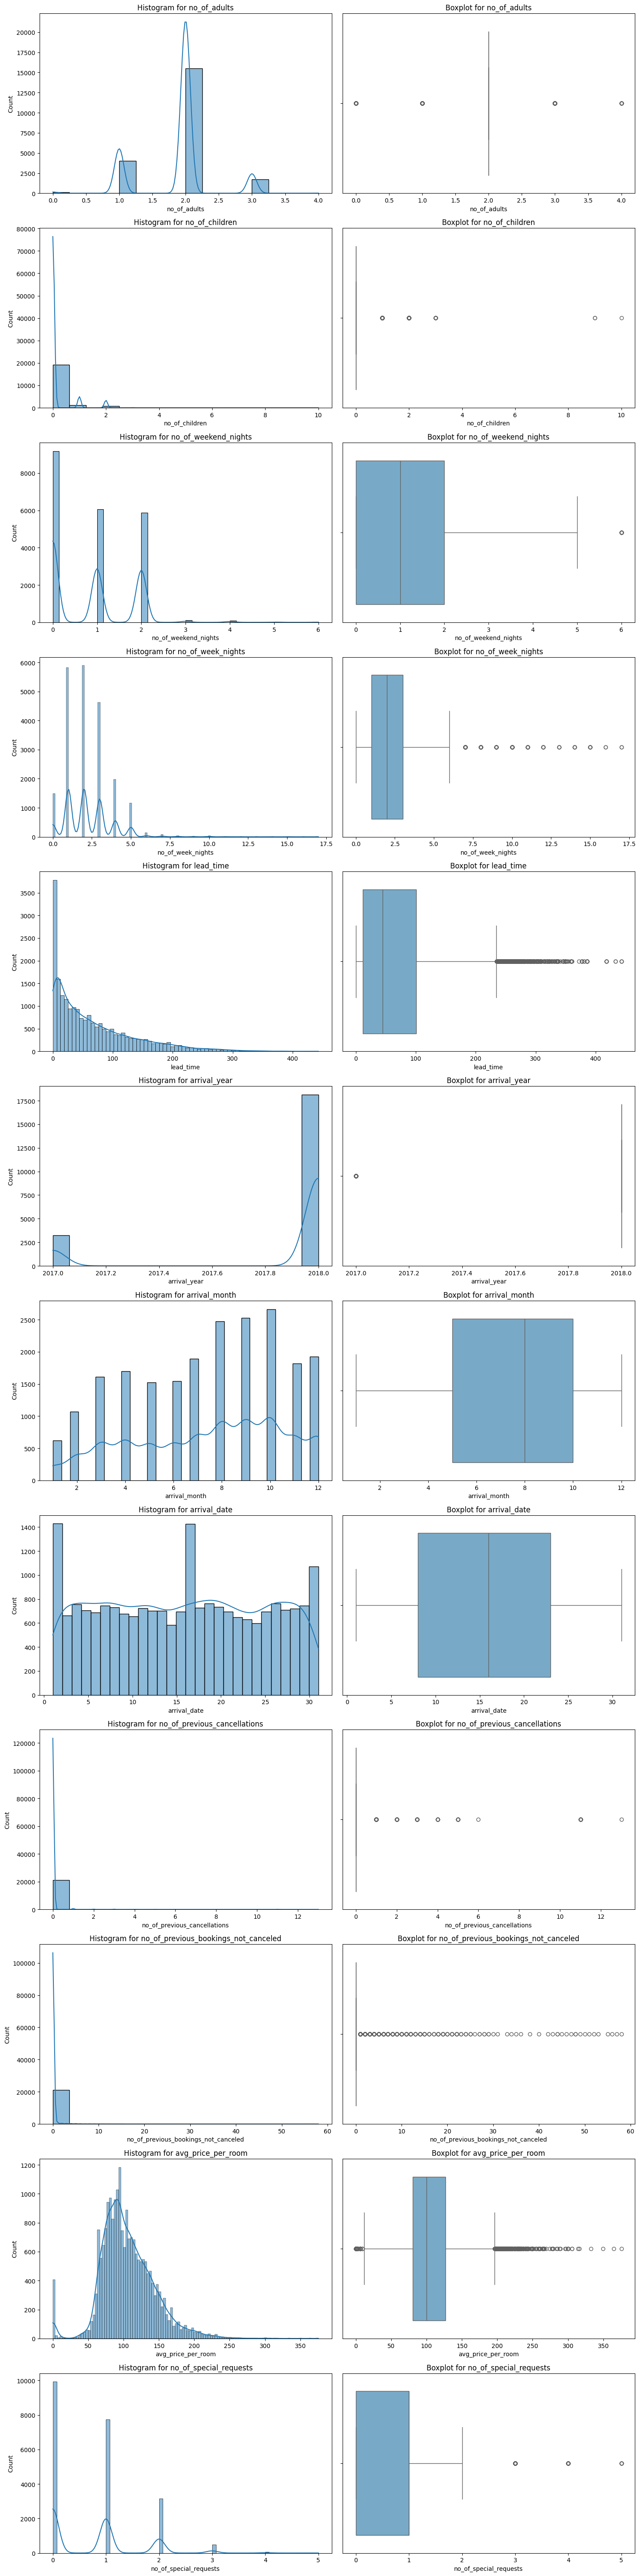

In [ ]:
num_plot_dist(df, num_cols)

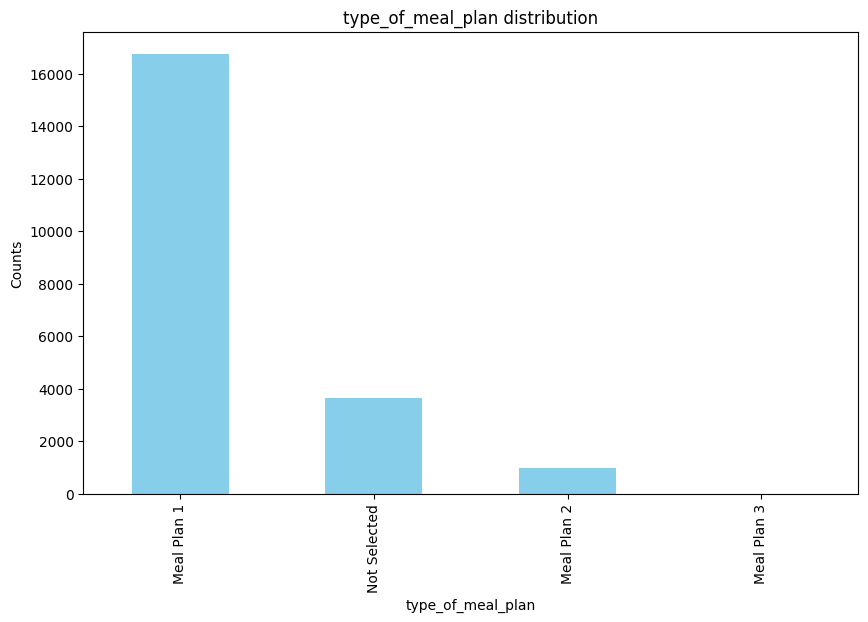

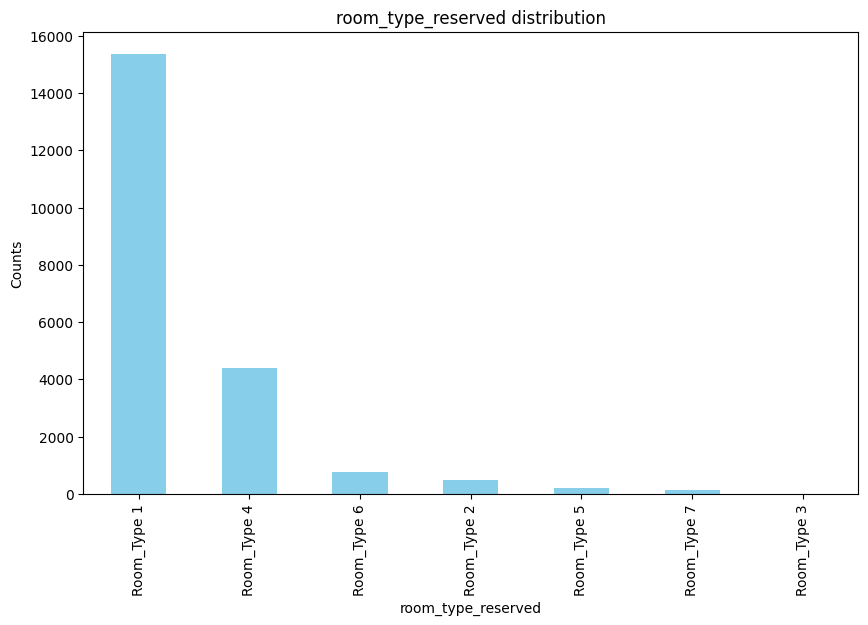

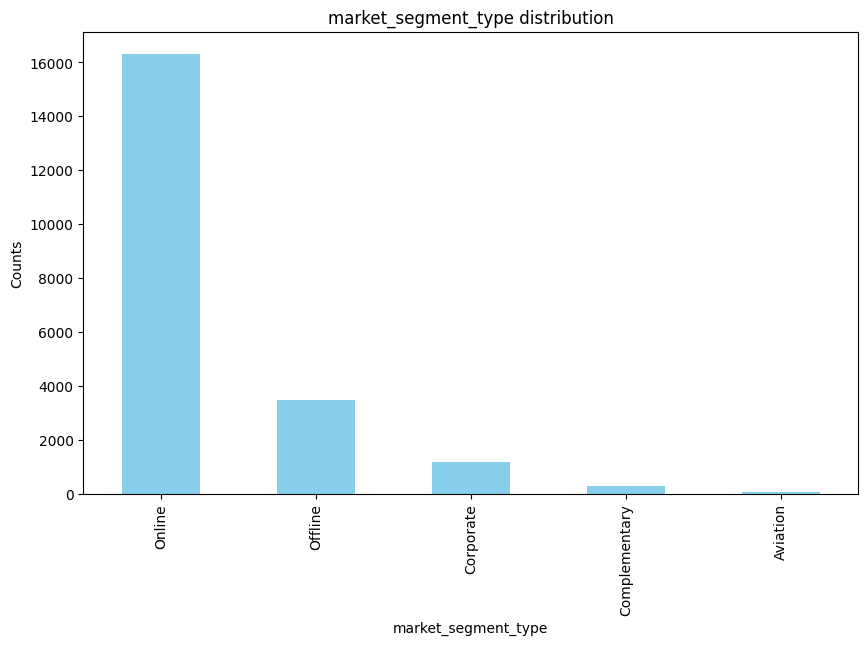

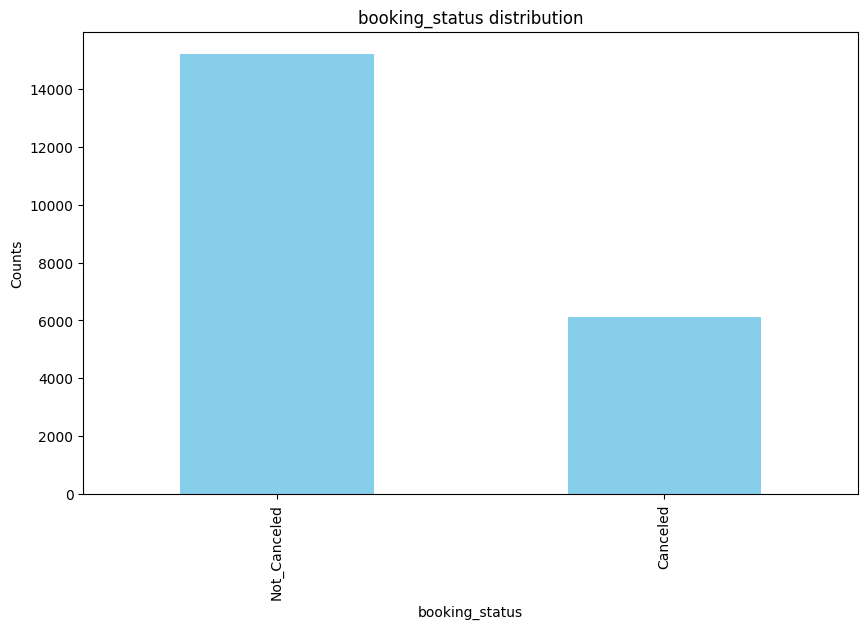

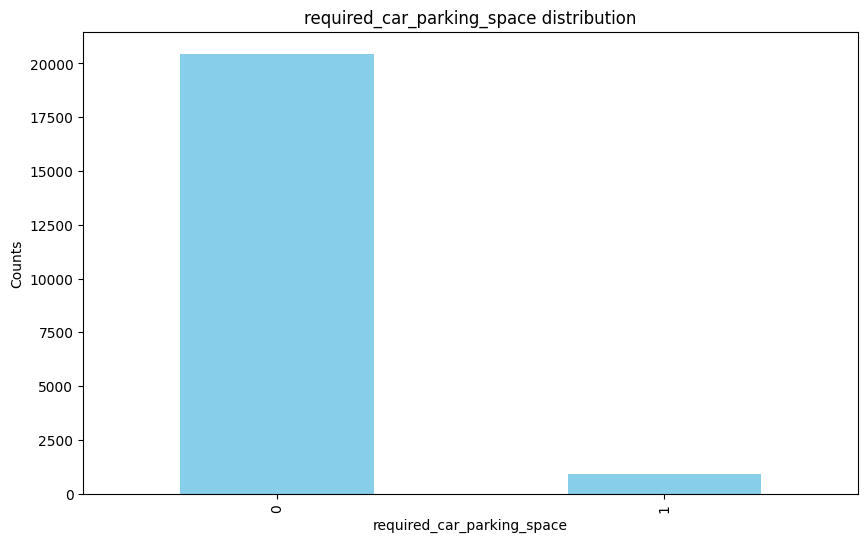

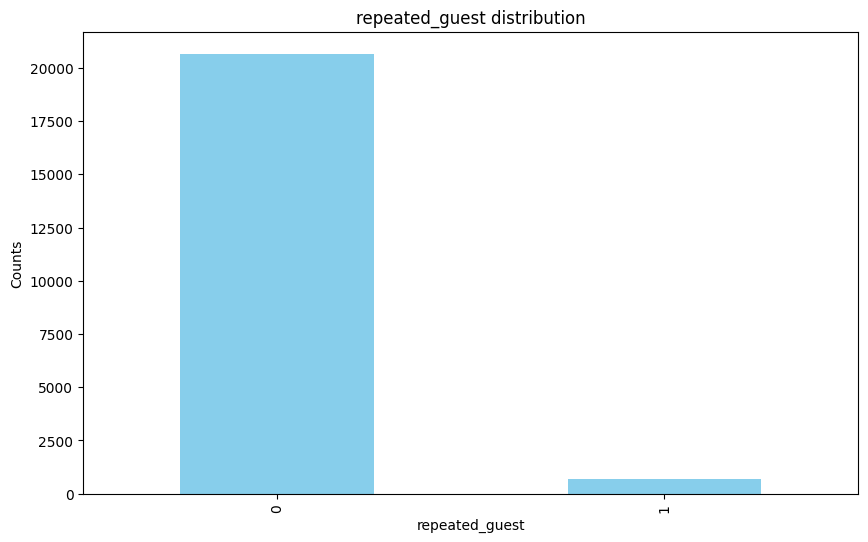

In [ ]:
for i in cat_cols:
  plt.figure(figsize=(10,6))
  data[i].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f"{i} distribution")
  plt.xlabel(i)
  plt.ylabel("Counts")
  plt.show()

In [ ]:
def plot_bivariate_num(df, target, num_features):
  num_plots = len(num_features)
  num_rows = (num_plots+1)//2

  fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
  axes = axes.flatten()

  for i,col in enumerate(num_features):
    sns.boxplot(x=target, y=col, ax=axes[i], data=df, palette="Blues")
    axes[i].set_title(f"{col} vs {target}")

  plt.tight_layout()
  plt.show()

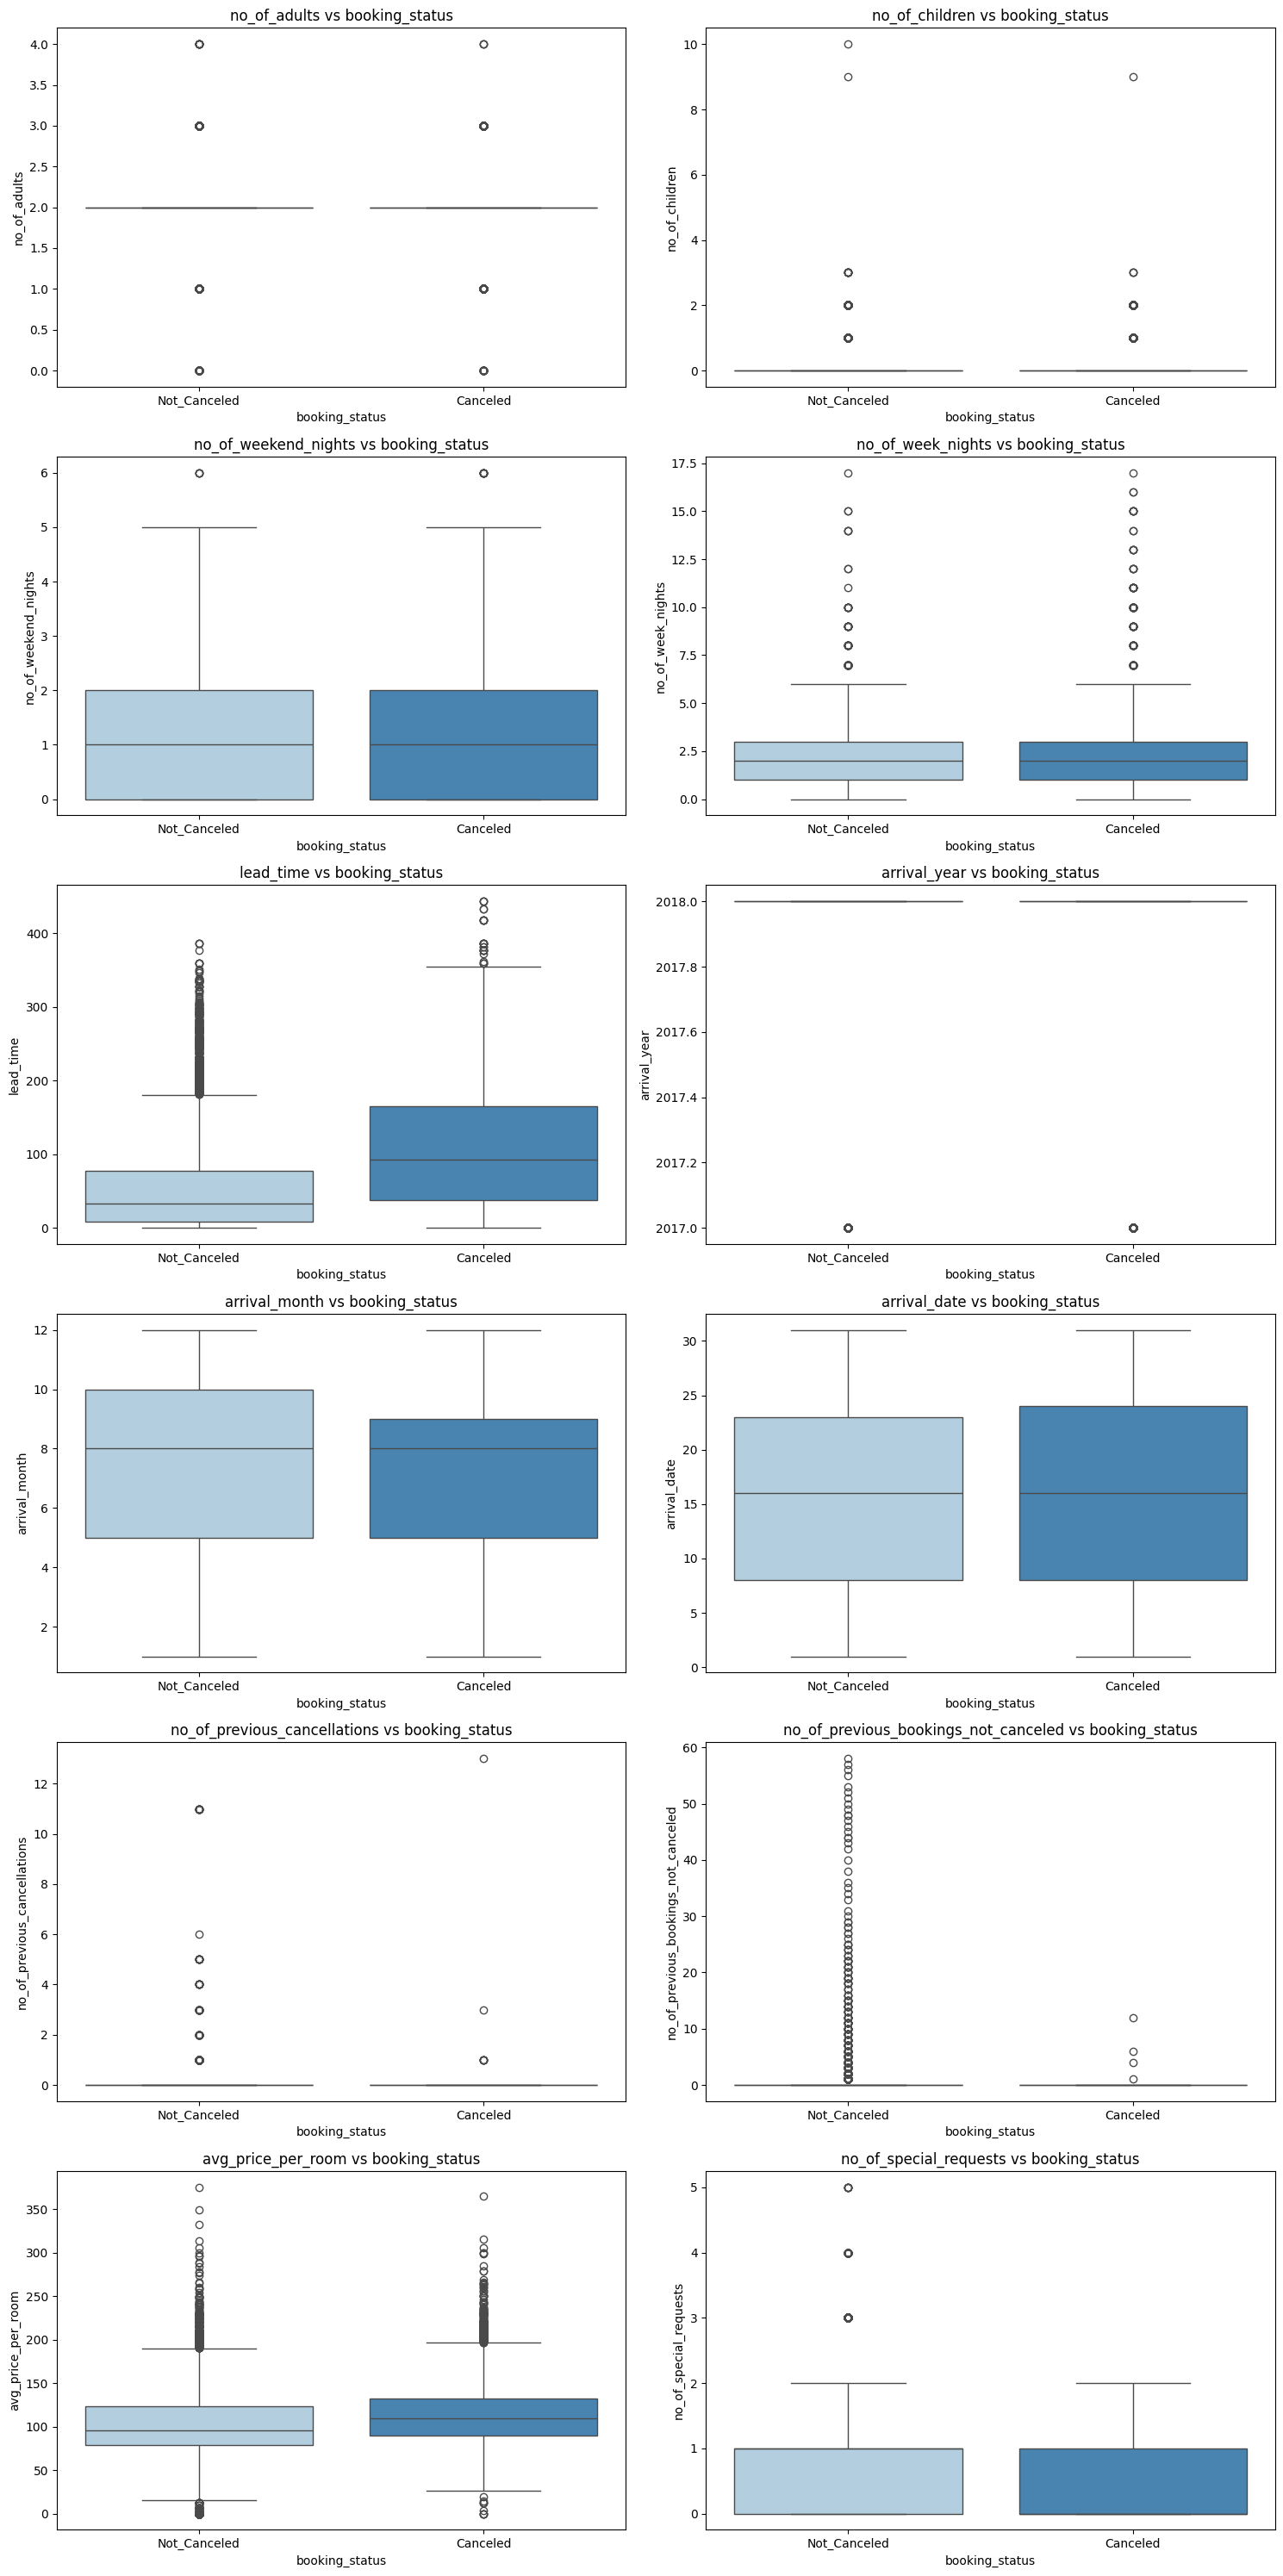

In [ ]:
plot_bivariate_num(df, 'booking_status', num_cols)

In [ ]:
def plot_bivariate_cat(df, target, cat_features):
  num_plots = len(cat_features)
  num_rows = (num_plots+1)//2

  fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
  axes = axes.flatten()

  for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue=target, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")
    axes[i].tick_params(axis='x', rotation=90)
  plt.tight_layout()
  plt.show()

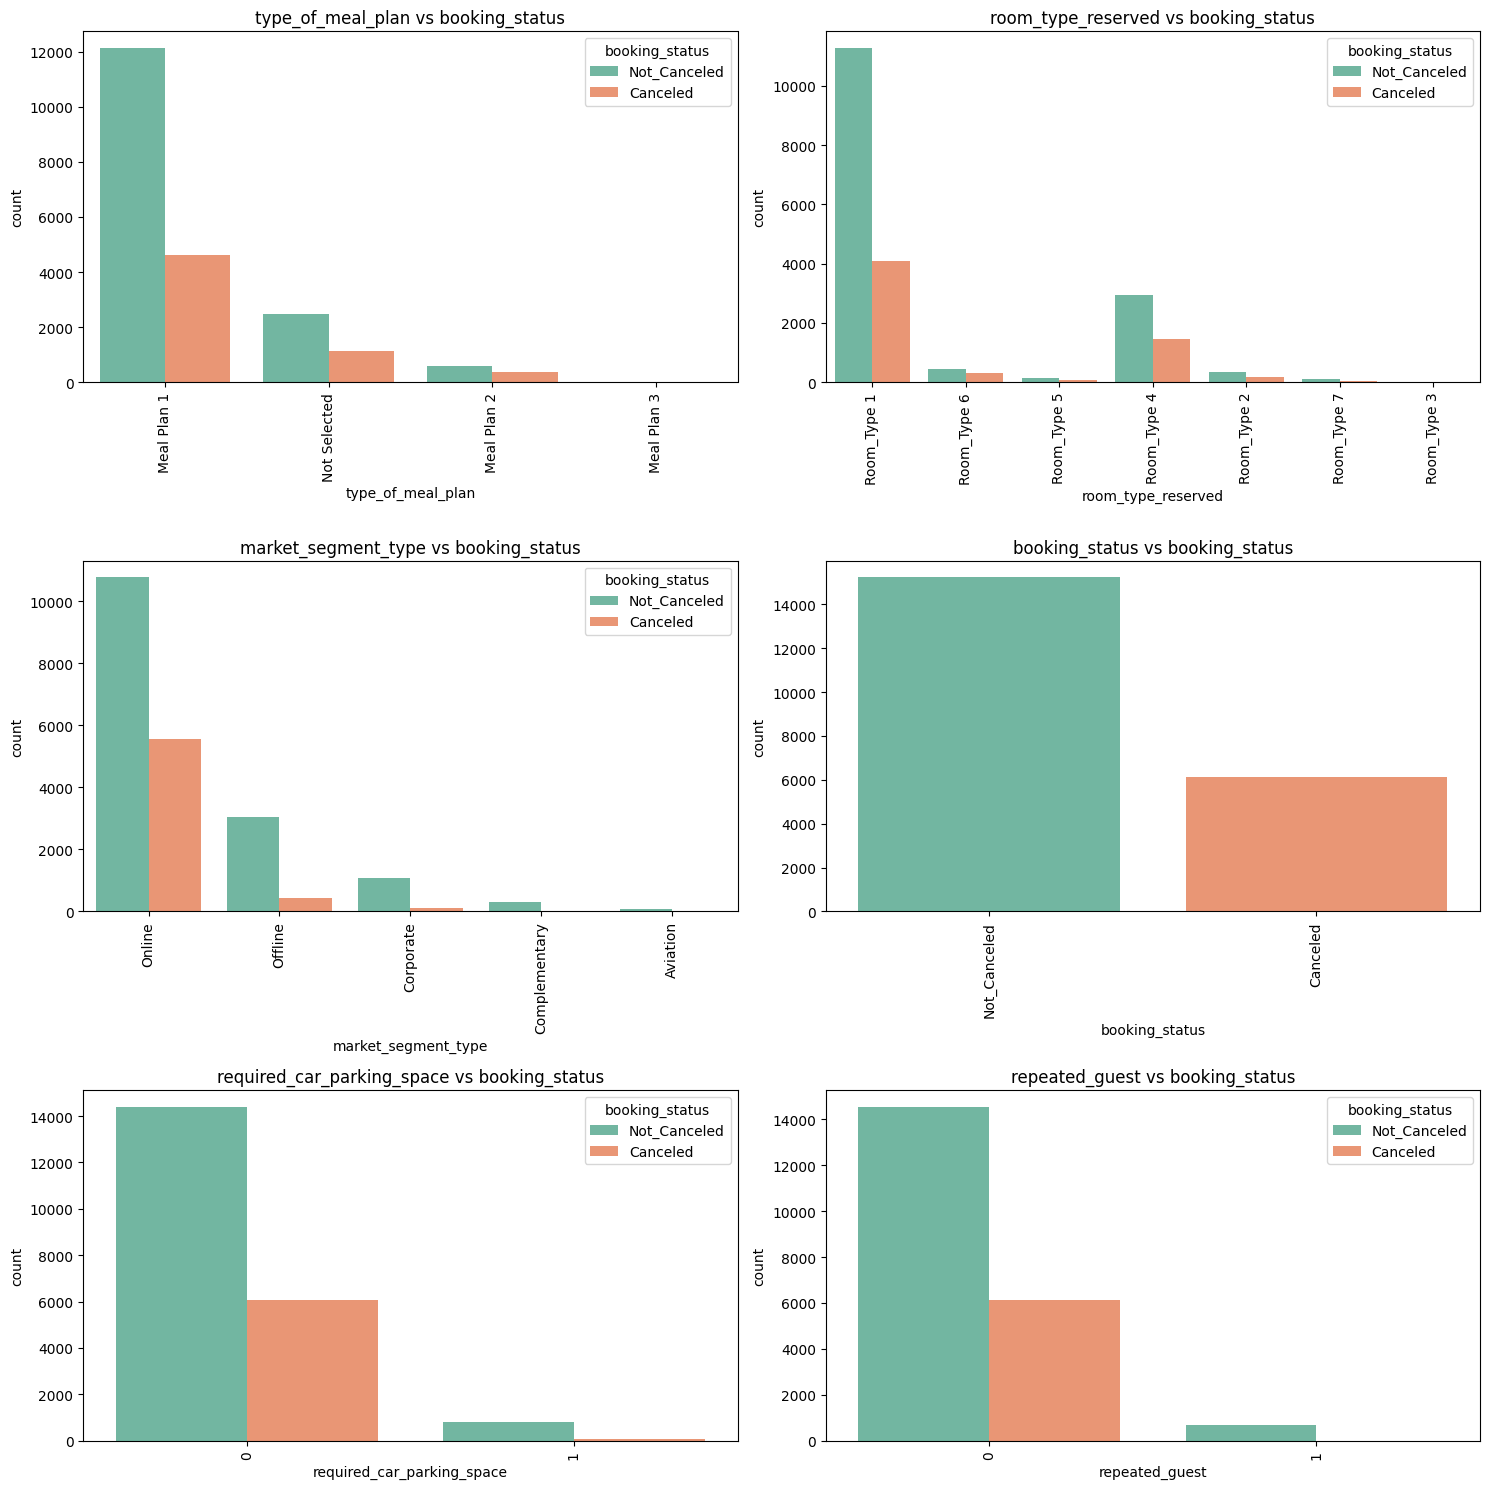

In [ ]:
plot_bivariate_cat(df, 'booking_status', cat_cols)

In [ ]:
lb = LabelEncoder()

mappings={}

for i in cat_cols:
  df[i] = lb.fit_transform(df[i])
  mappings[i] = {label: code for label,code in zip(lb.classes_, lb.transform(lb.classes_))}


In [ ]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [ ]:
x = add_constant(df)
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data #From the data we can understand that ther is no multicolinearity

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


<Axes: >

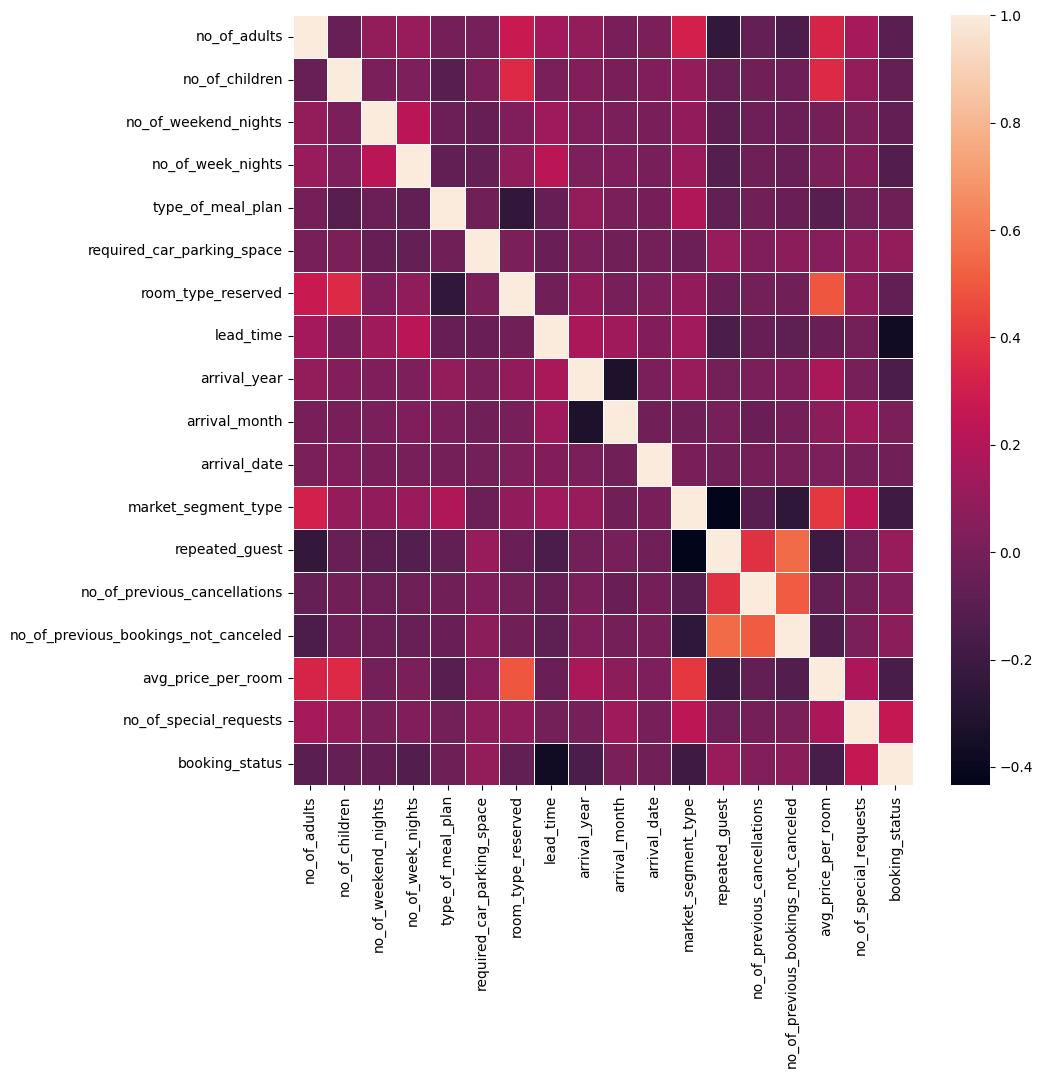

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidth = 0.5)

In [ ]:
skewness = df.skew()

In [ ]:
skewness

,0
no_of_adults,-0.305652
no_of_children,4.165696
no_of_weekend_nights,0.636637
no_of_week_nights,1.553657
type_of_meal_plan,1.650716
required_car_parking_space,4.538315
room_type_reserved,1.392145
lead_time,1.405258
arrival_year,-1.953273
arrival_month,-0.293266


In [ ]:
for i in df.columns:
  if skewness[i]>5:
    df[i] = np.log1p(df[i])

In [ ]:
df['booking_status'].value_counts()

,count
booking_status,
1,15231
0,6128


In [82]:
x = df.drop(columns=['booking_status'], axis=1)
y = df['booking_status']

In [84]:
y.value_counts()

,count
booking_status,
1,15231
0,6128


In [88]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [90]:
y_res.value_counts()

,count
booking_status,
1,15231
0,15231


In [91]:
x_res.shape

(30462, 17)

In [92]:
balanced_df = pd.DataFrame(x_res, columns=x.columns)
balanced_df['booking_status'] = y_res

In [93]:
balanced_df.shape

(30462, 18)

In [94]:
df = balanced_df.copy()

In [96]:
model = RandomForestClassifier(random_state=42)
x = df.drop(columns = ['booking_status'], axis=1)
y = df['booking_status']

model.fit(x,y)

RandomForestClassifier(random_state=42)

In [97]:
feature_importance = model.feature_importances_

In [98]:
feature_df = pd.DataFrame({
    "Features": x.columns,
    "Importance": feature_importance
})

In [103]:
top_features = feature_df.sort_values(by="Importance", ascending=False)

In [104]:
top_10_features = top_features["Features"].head(10).values

In [105]:
top_10_df = df[top_10_features.tolist()+["booking_status"]]

In [106]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [107]:
top_10_df.shape

(30462, 11)

In [109]:
df = top_10_df.copy()

In [114]:
x = df.drop(columns=['booking_status'],axis=1)
y = df['booking_status']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [116]:
classifiers ={
    "RandomForest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SupportVectorClassifier": SVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "XGboost": XGBClassifier(random_stat=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [117]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [118]:
for i, c in classifiers.items():
  c.fit(x_train, y_train)
  y_pred = c.predict(x_test)

  acc = accuracy_score(y_test, y_pred)
  p = precision_score(y_test, y_pred)
  r = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  metrics["Model"].append(i)
  metrics["Accuracy"].append(acc)
  metrics["Precision"].append(p)
  metrics["Recall"].append(r)
  metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [121]:
metrics_df = pd.DataFrame(metrics)

In [122]:
metrics_df #best ----RandomForest, XGBoost, LGBM

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.891679,0.892508,0.892508,0.892508
1,LogisticRegression,0.774331,0.802787,0.731922,0.765718
2,GradientBoosting,0.837190,0.821473,0.864821,0.842590
3,SupportVectorClassifier,0.720335,0.729657,0.706840,0.718068
4,DecisionTree,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779583,0.856376,0.675896,0.755507
6,NaiveBayes,0.773346,0.803232,0.728664,0.764133
7,XGboost,0.870343,0.866324,0.878176,0.872210
8,Adaboost,0.804202,0.821294,0.781433,0.800868
9,LGBM,0.866732,0.851494,0.890879,0.870742


In [124]:
x = df.drop(columns=['booking_status'],axis=1)
y = df['booking_status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [125]:
rf = RandomForestClassifier(random_state=42)

params = {
    "n_estimators" : randint(100,500),
    "max_depth": randint(10,50),
    "min_samples_split": randint(2,10),
    "min_samples_leaf": randint(1,5),
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions=params,
    n_iter = 5,
    cv = 5,
    verbose = 2,
    random_state = 42,
    scoring = 'accuracy'
)


In [126]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.6s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac09ad7cd90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac099d68d50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac09b936750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac09b9e7c90>},
                   random_state=42, scoring='accuracy', verbose=2)

In [127]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [130]:
best_rf_model = random_search.best_estimator_

In [131]:
y_pred = best_rf_model.predict(x_test)

In [134]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(acc, p, r, f1)

0.8921713441654358 0.8898222940226171 0.8970684039087948 0.8934306569343066


In [136]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']